##  Text Preprocessing & Sentiment Analysis on movie reviews with Naive Bayes 
- The Natural Language Toolkit (NLTK) is a platform used for processing textual data that will be later used in a text analysis program.
- Naive Bayes is a classification algorithm used usually in text classification and in problems with multiple classes.
- Sentiment Analysis is a text classification technique that assigns sentiment labels on words, sentences or documents. Here we use two sentiment labels: positive and negative
- Movie reviews is a collection of reviews included in NLTK corpus

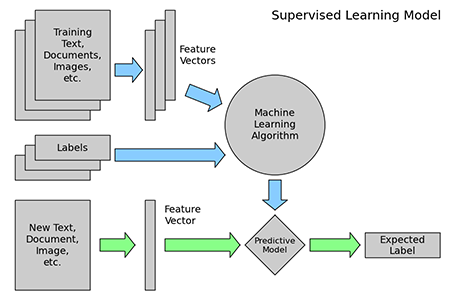

In [3]:
from IPython.display import Image
i = Image(filename='plot_ML_flow_chart_1 copy.png')
i

### 1. Preprocessing: Exploring & Preparing data 
- Making a list of documents (aka movie reviews) where each movie review will be a list of words followed by its positive or negative label.
- Convert words into features (most common words) and store them as either positive or negative movie reviews.

#### Print first ten pos reviews and neg reviews.

In [64]:
import nltk
from collections import defaultdict # A subclass of the built-in dict class.
from nltk.corpus import movie_reviews
documents = defaultdict(list) # Returns a new dictionary-like object.

for i in movie_reviews.fileids():
    documents[i.split('/')[0]].append(i)

print documents['pos'][:10]  
print
print documents['neg'][:10] 

print movie_reviews.categories()

[u'pos/cv000_29590.txt', u'pos/cv001_18431.txt', u'pos/cv002_15918.txt', u'pos/cv003_11664.txt', u'pos/cv004_11636.txt', u'pos/cv005_29443.txt', u'pos/cv006_15448.txt', u'pos/cv007_4968.txt', u'pos/cv008_29435.txt', u'pos/cv009_29592.txt']

[u'neg/cv000_29416.txt', u'neg/cv001_19502.txt', u'neg/cv002_17424.txt', u'neg/cv003_12683.txt', u'neg/cv004_12641.txt', u'neg/cv005_29357.txt', u'neg/cv006_17022.txt', u'neg/cv007_4992.txt', u'neg/cv008_29326.txt', u'neg/cv009_29417.txt']
[u'neg', u'pos']


#### Documents:  a list of tokenized words followed by its label for each review

In [3]:
# For each label in category: positive or negative,
# Take all of the review IDs and  store them as a list of tokenized words followed by its label
# This takes the most of the algorithm time.
documents = [(list(movie_reviews.words(fileid)), label)
             for label in movie_reviews.categories() 
             for fileid in movie_reviews.fileids(label)]
"""
The above loc is equal to:

documents[]
for label in movie_reviews.categories()
    for fileid in movie_reviews.fileids(label)]
    documents.append(list(movie_reviews.words(fileid)), label)    
"""

'\nThe above loc is equal to:\n\ndocuments[]\nfor label in movie_reviews.categories()\n    for fileid in movie_reviews.fileids(label)]\n    documents.append(list(movie_reviews.words(fileid)), label)    \n'

#### Remove punctuation from the documents and shuffle them

In [4]:
import random
import re

# Remove punctuation
documents = [
    ([re.sub("[^\w ]", "", word)
      for word in review if re.sub("[^\w ]", "", word) 
     ], label) # all non-words
    for review, label in documents]

# shuffle the data in order to have train and test on both labels.
random.shuffle(documents)
documents[0]

([u'there',
  u'were',
  u'four',
  u'movies',
  u'that',
  u'earned',
  u'jamie',
  u'lee',
  u'curtis',
  u'the',
  u'title',
  u'of',
  u'scream',
  u'queen',
  u'in',
  u'the',
  u'early',
  u'80s',
  u'two',
  u'of',
  u'them',
  u'were',
  u'halloween',
  u'movies',
  u'but',
  u'the',
  u'other',
  u'two',
  u'prom',
  u'night',
  u'and',
  u'terror',
  u'train',
  u'were',
  u'the',
  u'uninspired',
  u'knockoffs',
  u'that',
  u'came',
  u'directly',
  u'after',
  u'the',
  u'success',
  u'of',
  u'halloween',
  u'the',
  u'same',
  u'god',
  u'i',
  u'm',
  u'scared',
  u'there',
  u's',
  u'some',
  u'guy',
  u'in',
  u'a',
  u'mask',
  u'coming',
  u'after',
  u'me',
  u'routine',
  u'she',
  u'did',
  u'in',
  u'john',
  u'carpenter',
  u's',
  u'classic',
  u'jamie',
  u'lee',
  u'copies',
  u'here',
  u'with',
  u'none',
  u'of',
  u'the',
  u'urgency',
  u'or',
  u'suspense',
  u'terror',
  u'train',
  u'takes',
  u'place',
  u'on',
  u'where',
  u'else',
  u'a',
  u'tr

### 2. BOW Feature Extractor: Create a list of most popular words found in movie reviews
<p><b>Bigram Bag of Words</b> ignores the position of the word in the document.</p>
<p><b>all_words</b>: the list of features (bow) that we will search their presence in documents in the training part</p>

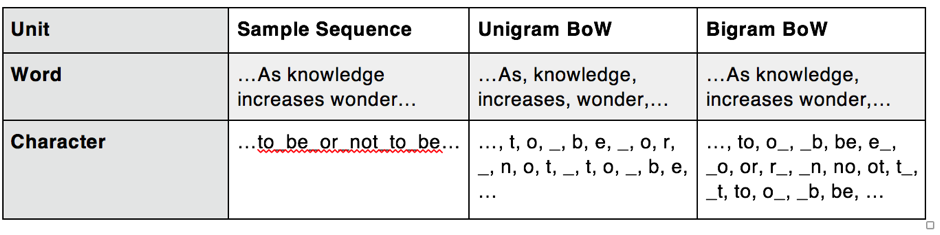

In [4]:
from IPython.display import Image
i = Image(filename='bow.png')
i

#### Remove stopwords of movie reviews and store them in 'all_words'

In [5]:
from nltk.corpus import stopwords
import string

sw = set(stopwords.words("english"))
all_words = []
for w in movie_reviews.words():
    w = w.lower()
    if w not in sw:
        all_words.append(w)

####  Frequency distribution of all words 

In [6]:
frequency_list = nltk.FreqDist(all_words) 
print(frequency_list.most_common(15))  # the most frequent words
print(frequency_list["stupid"]) # how many times the word stupid

[(u',', 77717), (u'.', 65876), (u"'", 30585), (u'"', 17612), (u'-', 15595), (u')', 11781), (u'(', 11664), (u'film', 9517), (u'one', 5852), (u'movie', 5771), (u'?', 3771), (u'like', 3690), (u':', 3042), (u'even', 2565), (u'time', 2411)]
253


### Search the precense of features within document
    - Features: 3000 most common words of movie reviews
    - If feature exist, store it in a dictionary with a boolean value. Naive Bayes on nltk accepts such an input format as valid

#### Convert a list into a set: unordered collection of unique objects, 
    - checking whether a word occurs in a set is much faster than checking whether it occurs in a list 
    - O(1)look ups
    
#### Formatters
    - work by putting in one or more replacement fields defined by a pair of curly braces {} — into a string and calling the str.format() method. 

In [7]:
# Convert words into features: store the top 3000 most common words of movie reviews
word_features = list(frequency_list.keys())[:3000] 

# Search for these features in a piece of text 
def find_features(document):
    document_words = set(document) 
    features = {} # empty dictionary, unordered key-value-pairs
    for w in word_features:
      # the key is the w in these 3000 words and the value will be a boolean value, if one of these words is within the document return true
        features['{}'.format(w)] = (w in document_words) 
    return features

#### Search for word features in reviews

In [8]:
print(find_features(movie_reviews.words()))

{'clamoring': True, 'madsen': True, 'sonja': True, 'unsworth': True, 'woods': True, 'spiders': True, 'gavan': True, 'francesco': True, 'francesca': True, 'fedoore': True, 'comically': True, 'negg': True, 'localized': True, 'conjure': True, 'stinks': True, 'disobeying': True, 'hennings': True, 'porno': True, 'canet': True, 'giacomo': True, 'stinky': True, 'scold': True, 'originality': True, 'neighbours': True, 'caned': True, 'rickman': True, 'worth': True, 'porns': True, 'alternating': True, 'amorous': True, 'copasetic': True, 'slothful': True, 'wracked': True, 'dougnac': True, 'aurora': True, 'stipulate': True, 'kissed_': True, 'helgenberger': True, 'capoeira': True, 'rosalba': True, 'crackin': True, 'rawhide': True, 'summarized': True, 'waterlogged': True, 'screaming': True, 'yikes': True, 'recollections': True, 'liaisons': True, 'grueling': True, 'sommerset': True, 'investigator': True, 'wooden': True, 'wednesday': True, 'broiled': True, 'samurai': True, 'circuitry': True, 'notifying

##### Reviews are stored one per file with a naming convention cv000 to cv999 for each of neg and pos
#### Load the first negative review file “cv000_29416.

In [9]:
print(find_features(movie_reviews.words('neg/cv000_29416.txt')))

{'clamoring': False, 'madsen': False, 'sonja': False, 'unsworth': False, 'woods': False, 'spiders': False, 'gavan': False, 'francesco': False, 'francesca': False, 'fedoore': False, 'comically': False, 'negg': False, 'localized': False, 'conjure': False, 'stinks': False, 'disobeying': False, 'hennings': False, 'porno': False, 'canet': False, 'giacomo': False, 'stinky': False, 'scold': False, 'originality': False, 'neighbours': False, 'caned': False, 'rickman': False, 'worth': False, 'porns': False, 'alternating': False, 'amorous': False, 'copasetic': False, 'slothful': False, 'wracked': False, 'dougnac': False, 'aurora': False, 'stipulate': False, 'kissed_': False, 'helgenberger': False, 'capoeira': False, 'rosalba': False, 'crackin': False, 'rawhide': False, 'summarized': False, 'waterlogged': False, 'screaming': False, 'yikes': False, 'recollections': False, 'liaisons': False, 'grueling': False, 'sommerset': False, 'investigator': False, 'wooden': False, 'wednesday': False, 'broiled':

### Sentiment classifier based on the Naive Bayes algorithm:
#### Predicts the probability that a given feature set belongs to a particular label.

- Uses the Bayes rule:  P(label|features) =  P(label) * P(features|label)/ P(features)

- 'Naive' assumption that all features are independent, given the label

- Predict an outcome given multiple evidenceP(label|features) = P(label) * P(f1|label) * ... * P(fn|label)/ P(features)

- Rather than computing P(features) explicitly, the algorithm just calculates the numerator for each label, and normalizes them so they sum to one: P(features) = SUM(label)( P(label) * P(f1|l) * ... * P(fn|label) )

#### Bayes Theorem
- <b>P(label)</b> is the prior probability of a label. P(negative) =  number of negative reviews/total number of reviews. P(positive) =  number of positive reviews/total number of reviews.
- <b>P(features|label)</b> is the likelihood probability, the likelihood of evidence:  What is the probability that a given feature set (outcome) will occur, given this positive or negative label (evidence). i.e.   P(Hate & Negative) = P(Hate) * P(Negative | Hate) 
- <b>P(features)</b> = number of feature set/total number of feature. It is the prior probability that a given feature set is occurred.      

In [10]:
# Feature Extractor
featuresets = [(find_features(review), label) for (review, label) in documents]

# Split the data into train and test
train_set, test_set = featuresets[:1900], featuresets[1900:]

# Train Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_set)

#### Classifier Accuracy:

In [11]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, test_set))*100)

('Classifier accuracy percent:', 72.0)


#### The top 15 influenceres (most informative features):

In [12]:
classifier.show_most_informative_features(15)

Most Informative Features
               insulting = True              neg : pos    =     18.3 : 1.0
            refreshingly = True              pos : neg    =      8.4 : 1.0
                    sans = True              neg : pos    =      8.3 : 1.0
                 wasting = True              neg : pos    =      8.3 : 1.0
              mediocrity = True              neg : pos    =      7.6 : 1.0
              cronenberg = True              pos : neg    =      7.0 : 1.0
               dismissed = True              pos : neg    =      7.0 : 1.0
             bruckheimer = True              neg : pos    =      6.3 : 1.0
               uplifting = True              pos : neg    =      5.9 : 1.0
                  doubts = True              pos : neg    =      5.8 : 1.0
                    lang = True              pos : neg    =      5.7 : 1.0
                  fabric = True              pos : neg    =      5.7 : 1.0
                 topping = True              pos : neg    =      5.7 : 1.0

#### Saving the classifier

In [20]:
import pickle

save_classifier = open("naivebayes.pickle", "wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

#### Seeing the accuracy on a random new example 

In [60]:
featuresets = [(find_features(test_set[10]), label) for (test_set[10], label) in documents]
classifier = nltk.NaiveBayesClassifier.train(featuresets)

In [61]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, featuresets))*100)

('Classifier accuracy percent:', 50.3)


#### Seeing the accuracy on a random new example 

In [56]:
review_santa = '''
 
It sucess sucess sucess sucess sucess would be impossible to sum up all the stuff that sucks about this film, so I'll break it down into what I remember most strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the "bear" from Hercules in New York); an extra with the most unnatural laugh you're ever likely to hear; an ex-dope addict martian with tics; kid actors who make sure every syllable of their lines are slowly and caaarreee-fulll-yyy prrooo-noun-ceeed; a newspaper headline stating that Santa's been "kidnaped", and a giant robot. Yes, you read that right. A giant robot.
 
The worst acting job in here must be when Mother Claus and her elves have been "frozen" by the "Martians'" weapons. Could they be *more* trembling? I know this was the sixties and everyone was doped up, but still.
'''

In [58]:
from nltk.tokenize import word_tokenize
words = word_tokenize(review_santa)
word_features = list(frequency_list.keys())[:5] 
featuresets = [(find_features(review), label) for (review, label) in documents]

#featuresets = find_features(review_santa)
classifier = nltk.NaiveBayesClassifier.train(featuresets)

print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, featuresets))*100)

('Classifier accuracy percent:', 50.3)
